## Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Exploration et analyse des données

In [2]:
# Charger les données
df = pd.read_csv("marketing_campaign.csv")
df.info()
df['Seniority']=pd.to_datetime(df['Dt_Customer'], dayfirst=True,format = '%d-%m-%Y')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [3]:
df.describe(include='all')


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Seniority
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,2013-07-10 10:01:42.857142784
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2012-07-30 00:00:00
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013-01-16 00:00:00
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013-07-08 12:00:00
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013-12-30 06:00:00
max,11191.000000,1996.000000,NaN,NaN,666666.000000,2.000000,2.000000,NaN,99.000000,1493.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2014-06-29 00:00:00


In [4]:
df.head ()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Seniority
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,2012-09-04
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,2014-03-08
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,2013-08-21
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,2014-02-10
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,2014-01-19


In [5]:

# Vérifier les valeurs manquantes
df.isnull().sum()


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Seniority               0
dtype: int64

## Nettoyage et prétraitement des données

In [6]:
# Supprimer colonnes non informatives
df = df.drop(['ID', 'Dt_Customer'], axis=1)

# Supprimer ou imputer les valeurs manquantes
df = df.dropna()

# Colonnes catégorielles
cat_cols = ['Education', 'Marital_Status']

# Colonnes numériques
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.difference(cat_cols)

# Pipeline de prétraitement
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

df_preprocessed = preprocessor.fit_transform(df)
df_preprocessed.shape

(2216, 36)

## Réduction de dimension par sélection de features ou MFA

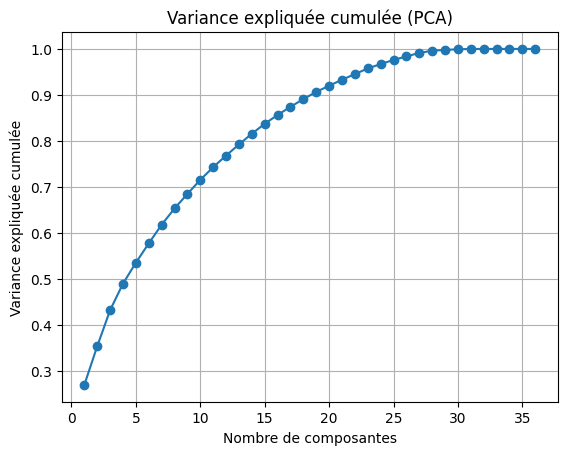

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=36)
df_pca = pca.fit_transform(df_preprocessed)

# Visualisation
n_components = len(pca.explained_variance_ratio_)
plt.plot(range(1, n_components + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Variance expliquée cumulée (PCA)")
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée cumulée")
plt.grid(True)
plt.show()

## Appliquer 3 algorithmes de classification non supervisée

In [8]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(df_pca)

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_pca)

# Clustering hiérarchique
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(df_pca)


## Comparer les résultats et évaluer les modèles

In [9]:
from sklearn.metrics import silhouette_score

print("Silhouette - KMeans:", silhouette_score(df_pca, kmeans_labels))
print("Silhouette - DBSCAN:", silhouette_score(df_pca, dbscan_labels))
print("Silhouette - Agglomerative:", silhouette_score(df_pca, agglo_labels))

Silhouette - KMeans: 0.30103451934504244
Silhouette - DBSCAN: 0.049416915405632436
Silhouette - Agglomerative: 0.2765959339110757


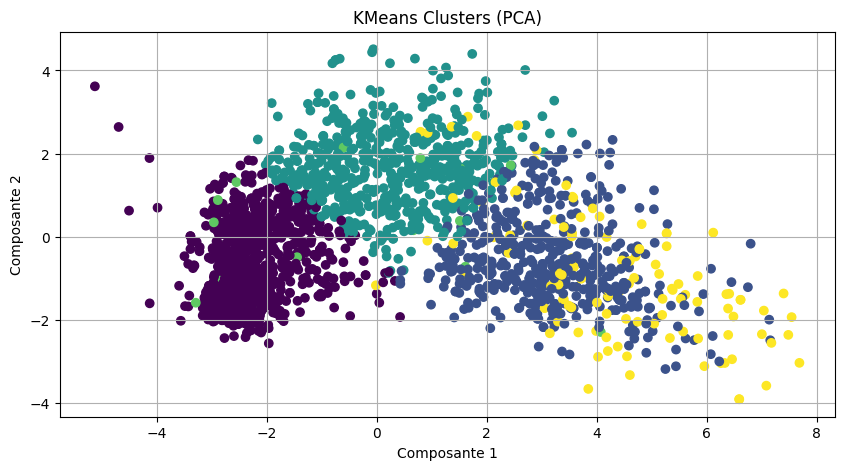

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("KMeans Clusters (PCA)")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.grid(True)
plt.show()


## Profiling des groupes (analyse des caractéristiques)

In [11]:
df['Cluster_KMeans'] = kmeans_labels

# Profiling par cluster
group_profile = df.groupby('Cluster_KMeans').mean(numeric_only=True)
group_profile

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Cluster_KMeans,,,,,,,,,,,,,,,,,,,,,
0,1972.082485,34461.543788,0.800407,0.424644,49.384929,38.393075,4.958248,22.600815,7.105906,5.028513,...,6.467413,0.075356,0.007128,0.000000,0.000000,0.002037,0.0,3.0,11.0,0.089613
1,1967.824701,75337.268924,0.039841,0.207171,49.390438,529.410359,71.703187,444.988048,104.095618,71.824701,...,2.838645,0.065737,0.023904,0.121514,0.105578,0.000000,0.0,3.0,11.0,0.183267
2,1964.079125,56943.271044,0.255892,0.947811,47.937710,435.993266,19.833333,127.047138,27.101010,20.789562,...,5.806397,0.060606,0.117845,0.003367,0.026936,0.000000,0.0,3.0,11.0,0.107744
3,1965.095238,45242.285714,0.666667,0.523810,53.047619,169.000000,24.190476,112.476190,25.761905,17.523810,...,5.809524,0.095238,0.000000,0.047619,0.000000,0.000000,1.0,3.0,11.0,0.142857
4,1970.452991,79871.564103,0.059829,0.213675,49.000000,940.923077,44.888889,398.777778,64.376068,52.863248,...,3.760684,0.153846,0.641026,0.837607,0.623932,0.239316,0.0,3.0,11.0,0.735043


In [12]:
df['Cluster_KMeans'] = kmeans_labels
print(pd.crosstab(df['Cluster_KMeans'], df['Education']))


Education       2n;Cycle  Basic  Graduation  Master  PhD
Cluster_KMeans                                          
0                    106     52         477     162  185
1                     51      1         289      63   98
2                     34      1         282     116  161
3                      4      0          14       2    1
4                      5      0          54      22   36
